# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Hang Chen

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200
Nx = 1000

mu_x = 1.5
s_x = 2.1
min_x = 1.25


X = np.zeros((Nt,Nx))


for i in range(Nt): # this is for time step
    
    for j in range(Nx): #this is for x step
        
        x_i = s_x*np.random.randn() + mu_x
        
        while (x_i < min_x):# this while loop is for exclude x_i < min_x
            x_i = s_x*np.random.randn() + mu_x            
                
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 

### Part I: Plot results (Distance .vs. Steps)


Text(0, 0.5, 'Distance Traveled [m]')

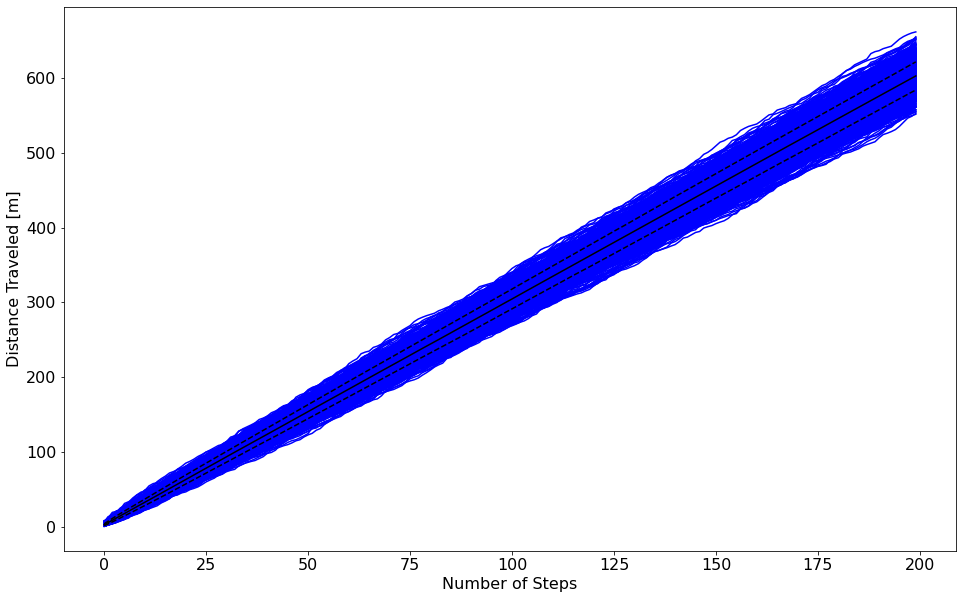

In [2]:
plt.rcParams.update({'font.size': 16}) # control the fontsize of the figure

plt.figure(figsize=(16,10)) # Create a new figure and make it 16" wide by 10" tall

plt.plot(np.arange(Nt),X,'b-') # Plot the location of all walkers versus time as blue lines
plt.plot(np.arange(Nt),np.mean(X,axis=1),'k-')# Plot mean value in black line
plt.plot(np.arange(Nt),np.mean(X,axis=1) + np.std(X,axis=1), 'k--') # Plot mean value + std value in black line
plt.plot(np.arange(Nt),np.mean(X,axis=1) - np.std(X,axis=1), 'k--') # Plot mean value - std value in black line

plt.xlabel('Number of Steps') 
plt.ylabel('Distance Traveled [m]') 

### Part I: Plot results (Histogram)

Text(0.0, 1.0, '(d)')

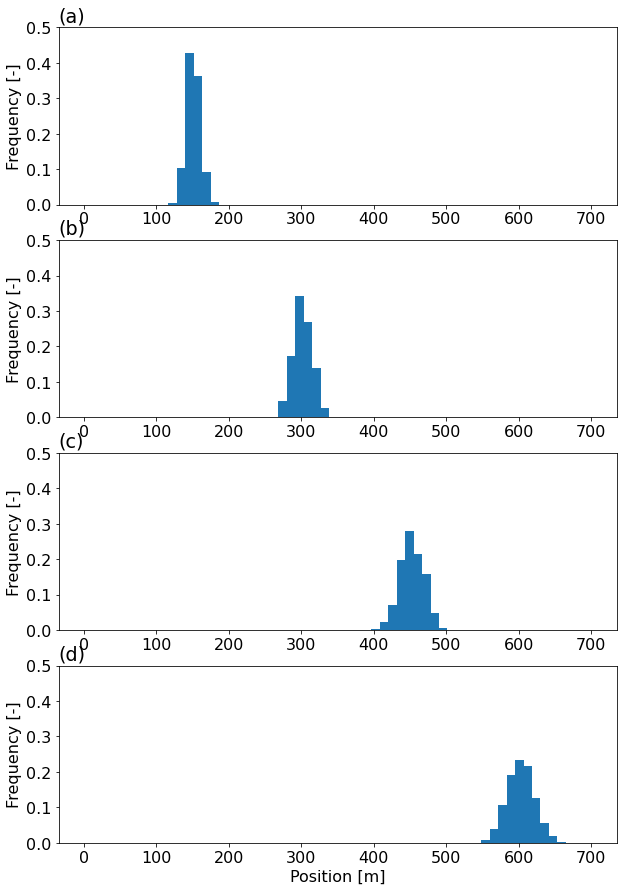

In [3]:
# Divide the datasets into four parts and each part has 50 datasets
x_50, be_50 = np.histogram(X[49,:], bins=60, range=(0,700))
x_100, be_100 = np.histogram(X[99,:], bins=60, range=(0,700))
x_150, be_150 = np.histogram(X[149,:], bins=60, range=(0,700))
x_200, be_200 = np.histogram(X[-1,:], bins=60, range=(0,700))

plt.figure(figsize=(10,15))

plt.subplot(4,1,1) #create subplot
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0]))
plt.ylim((0.0,0.5))
plt.ylabel('Frequency [-]')
plt.title('(a)',loc='left')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.5))
plt.ylabel('Frequency [-]')
plt.title('(b)',loc='left')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.5))
plt.ylabel('Frequency [-]')
plt.title('(c)',loc='left')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.5))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')
plt.title('(d)',loc='left')

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [4]:
Nt = 300
Nx = 3

mu_x = 0.5
s_x = 1.5
mu_y = 5.0
s_y = 2.5


### Part II: Generating a two-dimensional random walk model.

In this part, I would like to use the $x_i$ to be the location in $x$-direction of the "walker" at step $i$ and the $y_i$ to be the location in $y$-direction of the "walker" at step $i$. Each step in $x$-direction follows the normal distribution with mean $\mu_x$ and standard deviation $\sigma_x$, while each step in $y$-direction follows the normal distribution with mean $\mu_y$ and standard deviation $\sigma_y$.

In [5]:
#Create a container to store the position of the random walker 
# at each time step. Note that this corresponds to an array of 
# zeros that is Nt x 1.
x = np.zeros((Nt,Nx))
y = np.zeros((Nt,Nx))




for i in range(Nt): #this is for t step
    
    for j in range(Nx):#this is for x step

        # Calculate the step size at step i... note that np.random.randn() creates
        # a single random number with mean = 0, and standard deviation = 1.
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y

        # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
        # then there was no previous step, so the position is 0. If (i>0) the previous location
        # was the value of x at step i-1
        if(i==0): 
            x[i,j] = 0.0 + x_i # The new position is 0.0 plus the random step size
            y[i,j] = 0.0 + y_i # The new position is 0.0 plus the random step size
        else:
            x[i,j] = x[i-1,j] + x_i # The new position is the previous position plus the random step size
            y[i,j] = y[i-1,j] + y_i # The new position is the previous position plus the random step size

### Part II: Plot results

In this part, I use subfigure to show four figures: $x$ vs step, $y$ vs step, distance vs step and $x$ vs $y$. 

Text(0.0, 1.0, '(d)')

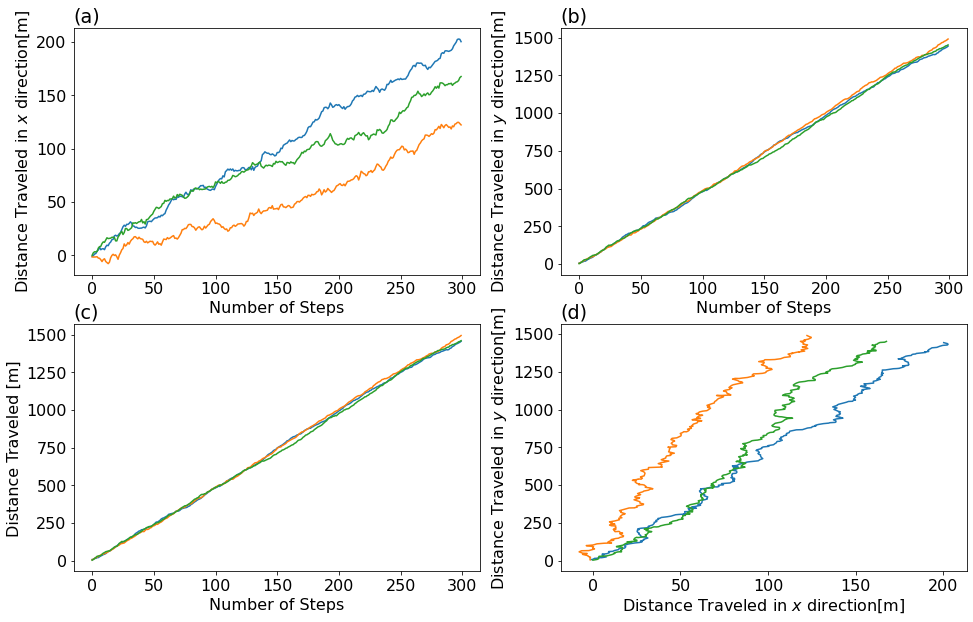

In [6]:
plt.rcParams.update({'font.size': 16}) 

plt.figure(figsize=(16,10)) # Create a figure and make it 16" wide x 10" tall

plt.subplot(2,2,1)
plt.plot(np.arange(Nt),x) # Plot x vs i (created using np.arange(Nt)) in three different colors
plt.xlabel('Number of Steps') # Label the x-axis as the number of steps
plt.ylabel('Distance Traveled in $x$ direction[m]') # Label distance traveled
plt.title('(a)',loc='left')

plt.subplot(2,2,2)
plt.plot(np.arange(Nt),y) # Plot y vs i (created using np.arange(Nt)) in three different colors
plt.xlabel('Number of Steps') # Label the x-axis as the number of steps
plt.ylabel('Distance Traveled in $y$ direction[m]') # Label distance traveled
plt.title('(b)',loc='left')

plt.subplot(2,2,3)
plt.plot(np.arange(Nt),np.sqrt(x**2+y**2)) # Plot sqrt(x^2+y^2) vs i (created using np.arange(Nt)) in three different colors
plt.xlabel('Number of Steps') # Label the x-axis as the number of steps
plt.ylabel('Distance Traveled [m]') # Label distance traveled
plt.title('(c)',loc='left')

plt.subplot(2,2,4)
plt.plot(x,y) # Plot x vs y (created using np.arange(Nt)) in three different colors
plt.xlabel('Distance Traveled in $x$ direction[m]') # Label the x-axis as the number of steps
plt.ylabel('Distance Traveled in $y$ direction[m]') # Label distance traveled
plt.title('(d)',loc='left')